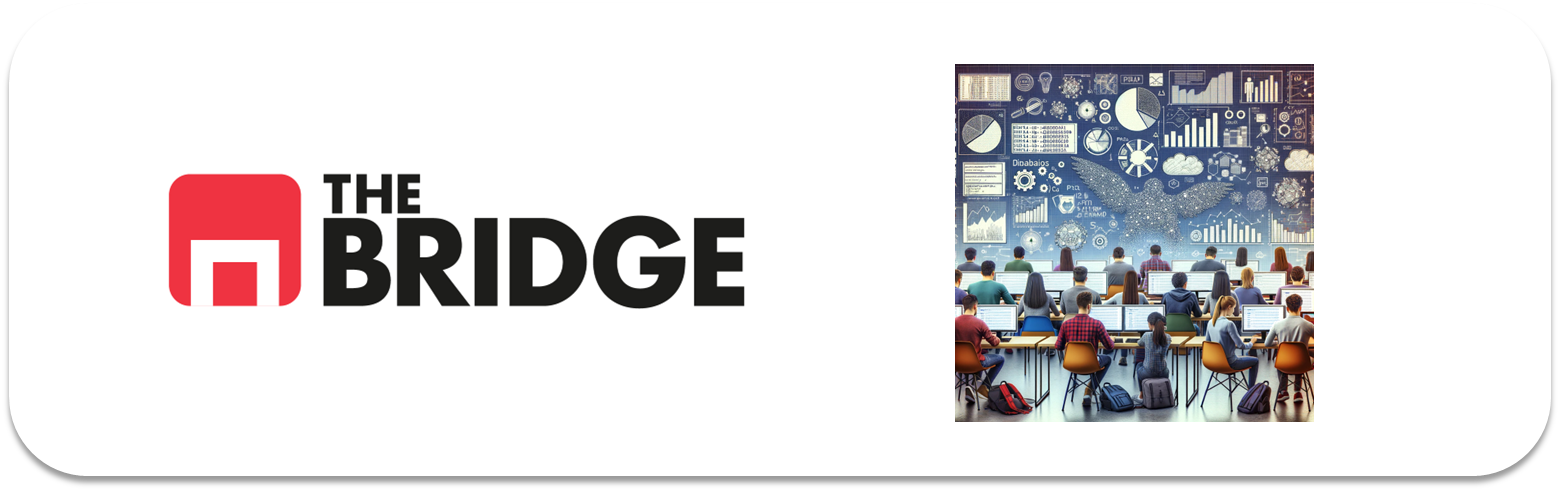

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [46]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [47]:
df= pd.read_csv("./data/hard_to_find/obligatoria_hard.csv",delimiter='|')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


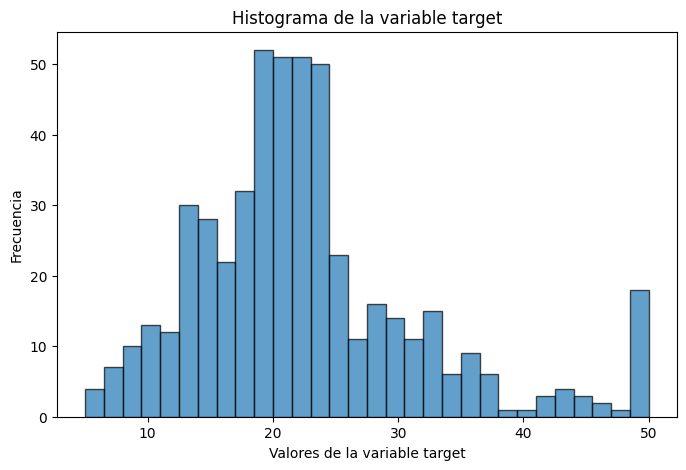

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['MEDV'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de la variable target')
plt.xlabel('Valores de la variable target')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\joser\AppData\Local\Temp\ipykernel_32436\3674739828.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['MEDV'], shade=True, color='blue', ax=axes[1])


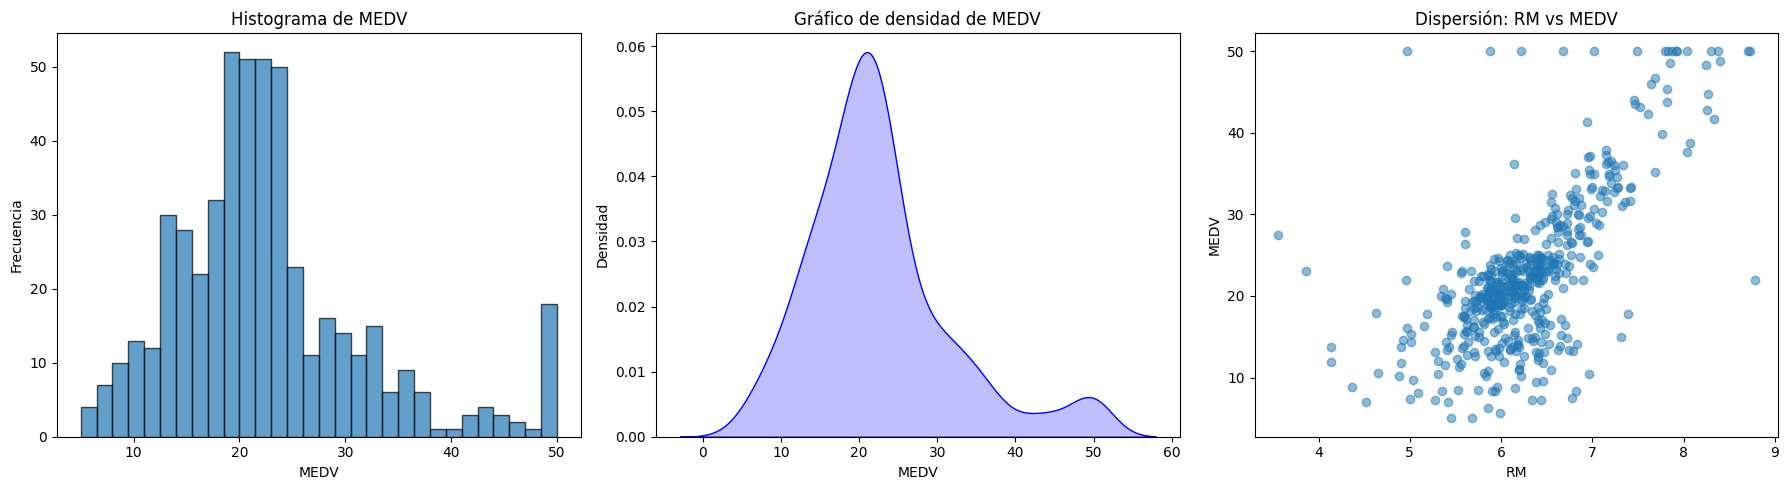

In [10]:
# Crear la figura y los ejes para 3 gráficos en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 fila, 3 columnas

# Gráfico 1: Histograma
axes[0].hist(df['MEDV'],bins=30, edgecolor='k', alpha=0.7)
axes[0].set_title('Histograma de MEDV')
axes[0].set_xlabel('MEDV')
axes[0].set_ylabel('Frecuencia')

# Gráfico 2: Gráfico de densidad
sns.kdeplot(df['MEDV'], shade=True, color='blue', ax=axes[1])
axes[1].set_title('Gráfico de densidad de MEDV')
axes[1].set_xlabel('MEDV')
axes[1].set_ylabel('Densidad')

# Gráfico 3: Diagrama de dispersión de ejemplo (MEDV vs RM)
axes[2].scatter(df['RM'], df['MEDV'], alpha=0.5)
axes[2].set_title('Dispersión: RM vs MEDV')
axes[2].set_xlabel('RM')
axes[2].set_ylabel('MEDV')

# Ajustar diseño
plt.tight_layout()
plt.show()

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split

# Selecciona las variables independientes (features) y la variable target
X = df.drop('MEDV', axis=1)  # Todas las columnas excepto MEDV
y = df['MEDV']  # La variable target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")



Tamaño del conjunto de entrenamiento: 404 muestras
Tamaño del conjunto de prueba: 102 muestras


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Seleccionar la correlación de cada variable con respecto a MEDV
correlation_with_target = correlation_matrix['MEDV'].sort_values(ascending=False)

# Mostrar los resultados
print(correlation_with_target)

In [26]:
df.CHAS.value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

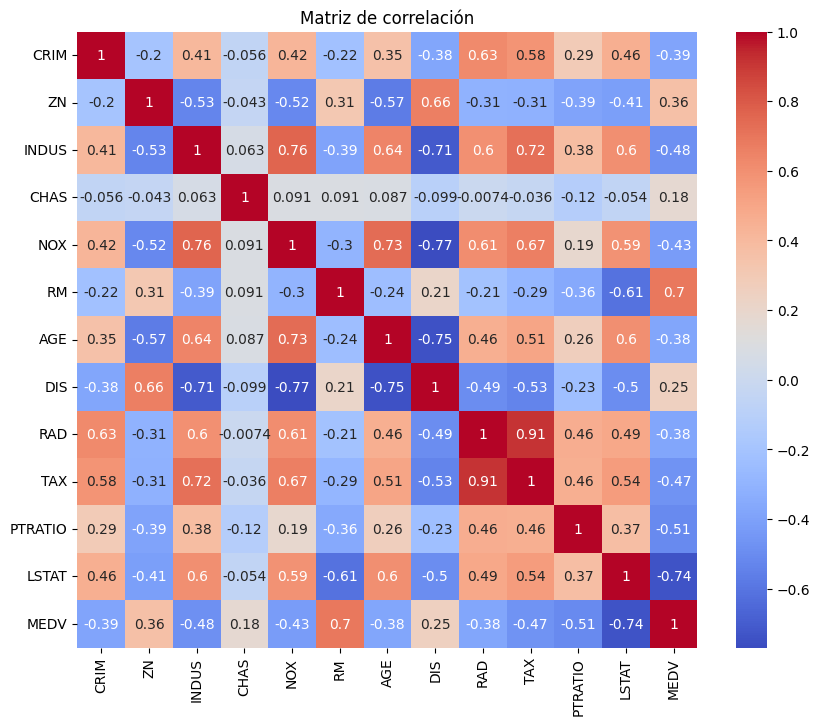

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


SI PUEDE SER RELEVANTE ***CRIM:*** Tasa de criminalidad per cápita por ciudad  
NO BAJA CORRELACION ***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
SI CORRELACION MEDIA ***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
NO POCOS ELEMENTOS DE UNA CADA CATEGORIA***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
SI FUERTE CORRELACION CON INDUS ***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
SI FUERTE CORRELACION MEDV ***RM:*** Número promedio de habitaciones por vivienda  
NO ***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
SI ***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
NO (FUERTE CORRELACION CON TAX)***RAD:*** Índice de accesibilidad a autopistas radiales  
SI ***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
NO ***PTRATIO:*** Relación alumno-maestro por ciudad  
SI ***LSTAT:*** % de población de estatus socioeconómico bajo  
TARGET ***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  


In [34]:
print(df[['TAX', 'RAD', 'MEDV']].corr())

           TAX       RAD      MEDV
TAX   1.000000  0.910228 -0.468536
RAD   0.910228  1.000000 -0.381626
MEDV -0.468536 -0.381626  1.000000


In [39]:
corr_matrix = df[['MEDV','DIS', 'INDUS', 'NOX', 'AGE']].corr()
print(corr_matrix)


           MEDV       DIS     INDUS       NOX       AGE
MEDV   1.000000  0.249929 -0.483725 -0.427321 -0.376955
DIS    0.249929  1.000000 -0.708027 -0.769230 -0.747881
INDUS -0.483725 -0.708027  1.000000  0.763651  0.644779
NOX   -0.427321 -0.769230  0.763651  1.000000  0.731470
AGE   -0.376955 -0.747881  0.644779  0.731470  1.000000


In [48]:
# Variable objetivo (target) y selección de características (features)
X = df[['INDUS', 'CRIM', 'TAX', 'RM', 'LSTAT', 'PTRATIO', 'DIS']]  # Features
y = df['MEDV']  # Target

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
#Escalado de las variables
scaler = StandardScaler()

# Ajustar el escalador solo con los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el mismo escalador ajustado
X_test_scaled = scaler.transform(X_test)

In [51]:
# 4. Entrenamiento del modelo
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
# Predicciones
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [53]:
# Evaluación del modelo
# Calcular métricas de evaluación: MSE y R^2
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Mostrar los resultados
print("Resultados en el conjunto de entrenamiento:")
print(f"MSE: {mse_train:.2f}")
print(f"R^2: {r2_train:.2f}")

print("\nResultados en el conjunto de prueba:")
print(f"MSE: {mse_test:.2f}")
print(f"R^2: {r2_test:.2f}")

Resultados en el conjunto de entrenamiento:
MSE: 24.91
R^2: 0.71

Resultados en el conjunto de prueba:
MSE: 27.18
R^2: 0.63


In [54]:
# Interpretar los coeficientes
# Mostrar los coeficientes y el intercepto del modelo
coefficients = model.coef_
intercept = model.intercept_

print("\nCoeficientes del modelo:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"\nIntercepto: {intercept:.2f}")



Coeficientes del modelo:
INDUS: -0.66
CRIM: -0.84
TAX: -0.43
RM: 3.29
LSTAT: -4.21
PTRATIO: -1.69
DIS: -1.91

Intercepto: 22.80


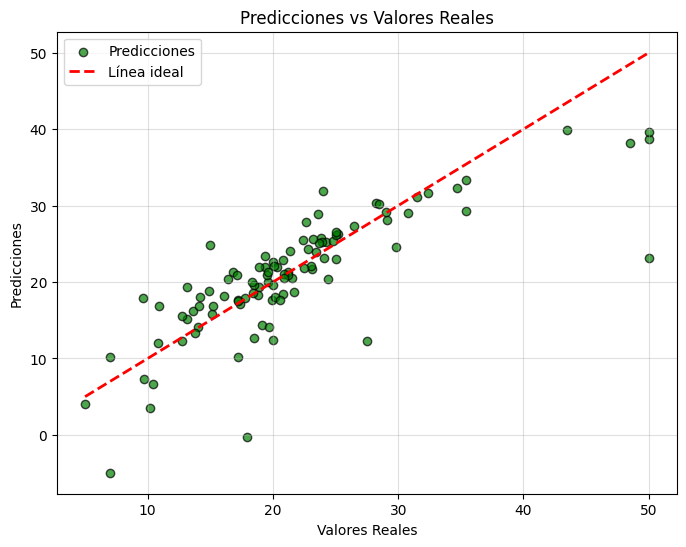

In [55]:
# Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green', edgecolors='k', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea ideal')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


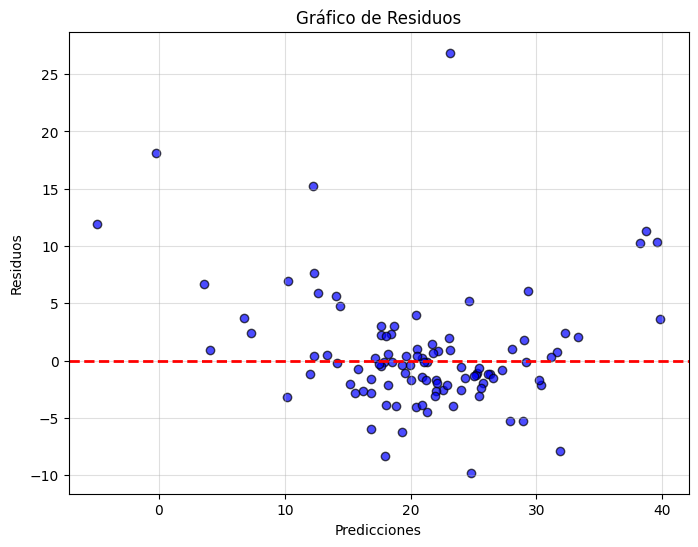

In [56]:
import matplotlib.pyplot as plt

# Calcular residuos
residuos = y_test - y_test_pred

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuos, alpha=0.7, color='blue', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(alpha=0.4)
plt.show()


In [60]:
def analisis (df,target):
    # Variable objetivo (target) y selección de características (features)
    X = df  # Features
    y = target # Target

    # Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Escalado de las variables
    scaler = StandardScaler()

    # Ajustar el escalador solo con los datos de entrenamiento y transformar
    X_train_scaled = scaler.fit_transform(X_train)

    # Transformar los datos de prueba con el mismo escalador ajustado
    X_test_scaled = scaler.transform(X_test)

    # Entrenamiento del modelo
    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train_scaled, y_train)

    # Predicciones
    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluación del modelo
    # Calcular métricas de evaluación: MSE y R^2
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Mostrar los resultados
    print("Resultados en el conjunto de entrenamiento:")
    print(f"MSE: {mse_train:.2f}")
    print(f"R^2: {r2_train:.2f}")

    print("\nResultados en el conjunto de prueba:")
    print(f"MSE: {mse_test:.2f}")
    print(f"R^2: {r2_test:.2f}")

    # Interpretar los coeficientes
    # Mostrar los coeficientes y el intercepto del modelo
    coefficients = model.coef_
    intercept = model.intercept_

    print("\nCoeficientes del modelo:")
    for feature, coef in zip(X.columns, coefficients):
        print(f"{feature}: {coef:.2f}")

    print(f"\nIntercepto: {intercept:.2f}")


In [64]:
X = df[['INDUS', 'TAX', 'RM', 'LSTAT', 'PTRATIO']]  # Features
y = df['MEDV']  # Target
analisis(X,y)

Resultados en el conjunto de entrenamiento:
MSE: 26.91
R^2: 0.69

Resultados en el conjunto de prueba:
MSE: 27.89
R^2: 0.62

Coeficientes del modelo:
INDUS: 0.65
TAX: -0.84
RM: 3.62
LSTAT: -3.96
PTRATIO: -1.77

Intercepto: 22.80
